# Moments of a Distribution
**Author:** Ian Ho | **Date:** Aug 25, 2023 | **Python Version:** 3.11

**Note:** To run this coding file, please install the Python package `pandas_datareader` by running the following command at your Anaconda prompt.
```
pip install pandas_datareader
```

In [1]:
import numpy as np                    # for numerical methods
import pandas as pd                   # for data handling
import pandas_datareader.data as web  # for grabbing data from some websites
import scipy.stats as stats           # for statistical functions
import matplotlib.pyplot as plt       # for plotting

## Calculate Moments of a Self-Created Distribution

In [2]:
df = pd.DataFrame({'X':  [1,     2,   3,   4],
                   'Pr': [0.2, 0.3, 0.4, 0.1]})
df

,X,Pr
0,1,0.2
1,2,0.3
2,3,0.4
3,4,0.1


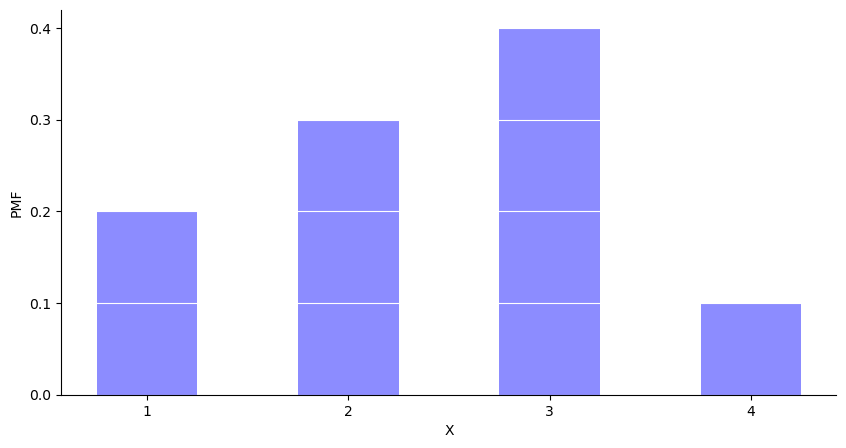

In [3]:
# We can also observe the distribution in a plot.
fig, ax = plt.subplots(figsize=(10,5))    # specify figure size

ax.bar(df['X'], df['Pr'], color='blue', alpha=0.45, width=0.5)

ax.grid(axis='y', color='white')          # add grid lines

ax.set_xlabel('X')                        # customize the labels on axes
ax.set_ylabel('PMF')

plt.xticks(range(1, 5))                   # customize the ticks on axes
plt.yticks(np.arange(0, 0.5, 0.1))

ax.spines['right'].set_visible(False)     # get rid of the line on the right
ax.spines['top'].set_visible(False)       # get rid of the line on the top

First, let's calculate the **mean (1st raw moment)** of $X$:
$$\mu_X = E(X) = \sum_{i=0}^3 x_i \cdot Pr(X = x_i)$$

In [4]:
X_Pr = df['X'] * df['Pr']
mean = sum(X_Pr)

print('The mean of X is {0:5.4f}.'.format(mean))

The mean of X is 2.4000.


Second, calculate the **variance (2nd central moment)** of $X$:
$$\sigma_X^2 = Var(X) = \sum_{i=0}^3 (x_i - \mu_X)^2 \cdot Pr(X=x_i)$$

In [5]:
dev2 = (df['X'] - mean)**2    # Alert: Python use ** as exponent operator, instead of ^.
dev2_Pr= dev2 * df['Pr']
variance = sum(dev2_Pr)

std_dev = np.sqrt(variance)

print('The variance of X is {0:5.4f}.'.format(variance))

The variance of X is 0.8400.


Third, calculate the **skewness (3rd standardized moment)** of $X$:
$$Skew(X) = \frac{1}{\sigma_X^3} \sum_{i=0}^3 (x_i - \mu_X)^3 \cdot Pr(X = x_i)$$

In [6]:
dev3 = (df['X'] - mean)**3
dev3_Pr= dev3 * df['Pr']
skew = sum(dev3_Pr) / (std_dev**3)

print('The skewness of X is {0:5.4f}.'.format(skew))

if skew < 0:
    print('The distribution of X is left-skewed.')
elif skew > 0:
    print('The distribution of X is right-skewed.')
else:
    print('The distribution of X is symmetric.')

The skewness of X is -0.0935.
The distribution of X is left-skewed.


Third, calculate the **kurtosis (4th standardized moment)** of $X$:
$$Kurt(X) = \frac{1}{\sigma_X^4} \sum_{i=0}^3 (x_i - \mu_X)^4 \cdot Pr(X = x_i)$$
and excess kurtosis: $Kurt(X) - 3$.

In [7]:
dev4 = (df['X'] - mean)**4
dev4_Pr= dev4 * df['Pr']
kurt = sum(dev4_Pr) / (std_dev**4)

excess_kurt = kurt - 3

print('The kurtosis of X is {0:5.4f} and the excess kurtosis is {1:5.4f}.'.format(kurt, excess_kurt))

if excess_kurt < 0:
    print('The distribution of X is platykurtic.')
elif excess_kurt > 0:
    print('The distribution of X is leptokurtic.')
else:
    print('The distribution of X is mesokurtic.')

The kurtosis of X is 2.1020 and the excess kurtosis is -0.8980.
The distribution of X is platykurtic.


## Calculate (Sample) Moments from a Real-World Data
[Stooq](https://stooq.com) provides historical pricing for indexes, and these data can be grabbed easily through the functions in the `pandas_datareader` package. In the following, we will use the data for the S\&P 500 Index (whose Stooq symbol is `^SPX`) in 2020 as an example.

In [8]:
sp = web.DataReader('^SPX', 'stooq', start='2020-01-01', end='2020-12-31')
sp

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,3733.27,3760.20,3726.88,3756.07,1658919486
2020-12-30,3736.19,3744.63,3730.21,3732.04,1559327835
2020-12-29,3750.01,3756.12,3723.31,3727.04,1638287436
2020-12-28,3723.03,3740.51,3723.03,3735.36,1662609796
2020-12-24,3694.03,3703.82,3689.32,3703.06,818784928
...,...,...,...,...,...
2020-01-08,3238.59,3267.07,3236.67,3253.05,2067161111
2020-01-07,3241.86,3244.91,3232.43,3237.18,1900211111
2020-01-06,3217.55,3246.84,3214.64,3246.28,2041150000


### Manual Calculation
Let's focus on the open prices. For showing the details in calculation, I will first manually compute the four moments, after which I will show how to use methods in `pandas` and `scipy.stats` to get them quickly.

We first calculate the mean of the open prices (denoted by $X$) by
$$\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i$$
where $n$ denotes the number of observations. Then, population and sample variance are calculated by the following formulae, respectively:
$$\sigma^2 = \frac{1}{n} \sum_{i=1}^n \left(X_i - \overline{X}\right)^2 \quad\text{and}\quad s^2 = \frac{1}{n-1} \sum_{i=1}^n \left(X_i - \overline{X}\right)^2$$
The sample variance is corrected for bias by degree-of-freedom adjustment.

In [9]:
mean = sum(sp['Open']) / len(sp.index)

dev2 = (sp['Open'] - mean)**2

# Population variance and standard deviation
pop_var = sum(dev2) / len(sp.index)
pop_std = np.sqrt(pop_var)

# Sample variance and standard deviation
spl_var = sum(dev2) / (len(sp.index) - 1)
spl_std = np.sqrt(spl_var)

print('For the open price for the S&P 500 Index in 2020, its mean is {0:9.4f}, population variance is {1:10.4f}, and sample variance is {2:9.4f}.'.format(mean, pop_var, spl_var))

For the open price for the S&P 500 Index in 2020, its mean is 3217.7503, population variance is 100954.3432, and sample variance is 101354.9557.


The calculation becomes more complicated for sample skewness and sample kurtosis. For skewness, an intuitive but biased estimator is
$$g_1 = \frac{\frac{1}{n} \sum_{i=1}^n \left(X_i - \overline{X}\right)^3}{\left[\frac{1}{n} \sum_{i=1}^n \left(X_i - \overline{X}\right)^2\right]^{\frac{3}{2}}}$$
A common (but not always) corrected-for-bias estimator is
$$G_1 = \frac{\sqrt{n(n-1)}}{n-2} \cdot g_1$$
Note that the estimator $G_1$ is unbiased for skewness only when the random variable follows a normal distribution.

In [10]:
dev3 = (sp['Open'] - mean)**3

skew_bias = sum(dev3) / len(sp.index) / (pop_std**3)
skew_correct = np.sqrt(len(sp.index)*(len(sp.index)-1)) / (len(sp.index)-2) * skew_bias
print('The biased sample skewness is {0:9.6f}, and the corrected-for-bias sample skewness is {1:9.6f}.'.format(skew_bias, skew_correct))

The biased sample skewness is -0.692858, and the corrected-for-bias sample skewness is -0.696997.


For kurtosis, an intuitive but biased estimator is
$$g_2 = \frac{\frac{1}{n} \sum_{i=1}^n \left(X_i - \overline{X}\right)^4}{\left[\frac{1}{n} \sum_{i=1}^n \left(X_i - \overline{X}\right)^2\right]^2}$$
A corrected-for-bias estimator is
$$G_2 = \frac{(n-1)(n+1)}{(n-2)(n-3)} g_2 + 3\left[1 - \frac{(n-1)^2}{(n-2)(n-3)}\right]$$
Similarly, this estimator ($G_2$) is also unbiased only when the random variable follows a normal distribution.

In [11]:
dev4 = (sp['Open'] - mean)**4

kurt_bias = sum(dev4) / len(sp.index) / (pop_std**4)
kurt_correct = (len(sp.index)-1) * (len(sp.index)+1) / ((len(sp.index)-2)*(len(sp.index)-3)) * kurt_bias + 3*(1 - ((len(sp.index)-1)**2)/(len(sp.index)-2)/(len(sp.index)-3))
print('The biased sample kurtosis is {0:8.6f}, and the corrected-for-bias sample kurtosis is {1:8.6f}.'.format(kurt_bias, kurt_correct))

The biased sample kurtosis is 3.100869, and the corrected-for-bias sample kurtosis is 3.126987.


### Calculating Moments by `pandas`
As of now, we've seen how to compute the four moments by comlicated algebra. Fortunately, methods in `pandas` and `scipy.stats` packages can save our time in computation.

Let's focus on the `pandas` at first. Note that
* The methods `var()`, `skew()`, and `kurt()` return corrected-for-bias estimates.
* The method `kurt()` computes the excess kurtosis.

In [12]:
print('The sample moments of the open prices of S&P 500 Index are')
print('  Mean: {0:9.6f}'.format(sp['Open'].mean()))
print('  Variance: {0:9.6f}'.format(sp['Open'].var()))
print('  Skewness: {0:9.6f}'.format(sp['Open'].skew()))
print('  Kurtosis: {0:9.6f}'.format(sp['Open'].kurt()))

The sample moments of the open prices of S&P 500 Index are
  Mean: 3217.750277
  Variance: 101354.955719
  Skewness: -0.696997
  Kurtosis:  0.126987


We can get these moments (with sample standard deviation) at once by using the `agg()` method.

In [13]:
sp['Open'].agg(['mean', 'var', 'std', 'skew', 'kurt'])

mean      3217.750277
var     101354.955719
std        318.362931
skew        -0.696997
kurt         0.126987
Name: Open, dtype: float64

### Calculating Moments by `scipy.stats`
The `scipy.stats` package has two methods (`skew()` and `kurtosis()`) for computing sample skewness and kurtosis respectively. Compared with those methods in `pandas`, these two methods are more flexible:
* We can select whether to correct for bias.
* We can select to compute the kurtosis (Pearson) or the excess kurtosis (Fisher).

In [14]:
print('Biased sample skewness: {0:8.6f}'.format(stats.skew(sp['Open'], bias=True)))
print('Corrected sample skewness: {0:8.6f}'.format(stats.skew(sp['Open'], bias=False)))
print('Biased sample kurtosis: {0:8.6f}'.format(stats.kurtosis(sp['Open'], fisher=False, bias=True)))
print('Corrected sample kurtosis: {0:8.6f}'.format(stats.kurtosis(sp['Open'], fisher=False, bias=False)))
print('Biased sample excess kurtosis: {0:8.6f}'.format(stats.kurtosis(sp['Open'], fisher=True, bias=True)))
print('Corrected sample excess kurtosis: {0:8.6f}'.format(stats.kurtosis(sp['Open'], fisher=True, bias=False)))

Biased sample skewness: -0.692858
Corrected sample skewness: -0.696997
Biased sample kurtosis: 3.100869
Corrected sample kurtosis: 3.126987
Biased sample excess kurtosis: 0.100869
Corrected sample excess kurtosis: 0.126987


We can also get the summary statistics at once by using the `describe()` method. As above, the `bias` argument allows us to use the biased or corrected-for-bias estimation. Also note that the reported "kurtosis" is actually "excess kurtosis".

In [15]:
stats.describe(sp['Open'], bias=False)

DescribeResult(nobs=253, minmax=(2290.71, 3750.01), mean=3217.750276679842, variance=101354.95571936759, skewness=-0.6969968577449013, kurtosis=0.12698651844837272)